# Book Recommender System

Name:Tooba Azam

Id: 2020-1-60-262

Section: 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

<ipython-input-2-9c7748cfef89>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
<ipython-input-2-9c7748cfef89>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
<ipython-input-2-9c7748cfef89>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")


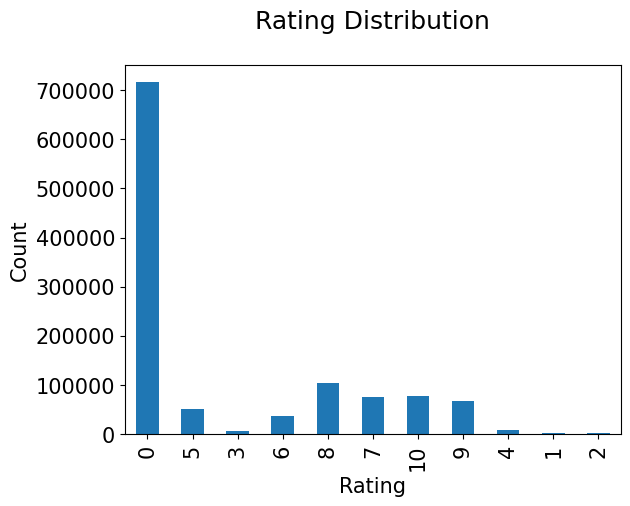

In [ ]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [ ]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [ ]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


In [ ]:
print(ratings.shape)
print(list(ratings.columns))

(527556, 3)
['userID', 'ISBN', 'bookRating']


In [ ]:
print(books.shape)
print(list(books.columns))

(271379, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [ ]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...
488751,275970,1892145022,0,Here Is New York
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
488753,275970,3411086211,10,Die Biene.
488754,275970,3829021860,0,The Penis Book


In [ ]:
print(combine_book_rating.shape)

(488756, 4)


# Showing the Top-10 Recommended Books for a User.

In [ ]:
pivot_table = combine_book_rating.pivot_table(index='userID', columns='bookTitle', values='bookRating', fill_value=0)

In [ ]:
pivot_table

bookTitle,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Always Have Popsicles,Apple Magic (The Collector's series),Beyond IBM: Leadership Marketing and Finance for the 1990s,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),Dark Justice,Deceived,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),Flight of Fancy: American Heiresses (Zebra Ballad Romance),...,"Â¿QuÃ© me quieres, amor?","Ã?ber den Wunsch, sich wohlzufÃ¼hlen: Geschichten",Ã?coute ma diffÃ©rence (Le Temps des femmes),Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,Ã?Â?lpiraten.,Ã?Â?rger mit Produkt X. Roman.,Ã?Â?stlich der Berge.,Ã?Â?thique en toc
userID,,,,,,,,,,,,,,,,,,,,,
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sparse_matrix = csr_matrix(pivot_table.values)

In [ ]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn_model.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [ ]:
def get_recommendations(user_id):
    user_ratings = pivot_table.loc[user_id].values.reshape(1, -1)
    distances, indices = knn_model.kneighbors(user_ratings, n_neighbors=10 + 1)


    indices = indices.flatten()[1:]

    recommended_books = pivot_table.iloc[indices].mean(axis=0).sort_values(ascending=False)

    return recommended_books.index[:10]

In [ ]:
user_id_input = input("Enter the User ID: ")
user_id = int(user_id_input)
recommended_books = get_recommendations(user_id)
print(f"Top 10 recommended books for User {user_id}:\n{recommended_books}")

Enter the User ID: 277427
Top 10 recommended books for User 277427:
Index(['Me Talk Pretty One Day', 'The Da Vinci Code', 'Angels & Demons',
       'To the Nines: A Stephanie Plum Novel', 'Midwives: A Novel',
       'The Girls' Guide to Hunting and Fishing', 'Jurassic Park',
       'The Partner',
       'Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object', name='bookTitle')


# Showing the Probable Rating of an ISBN Number of Book by a User.

---



In [ ]:
pivot_table2 = combine_book_rating.pivot_table(index='userID', columns='ISBN', values='bookRating', fill_value=0)

In [ ]:
pivot_table2

ISBN,0000913154,0001010565,0001046438,000104687X,0001047213,0001047663,0001047868,0001047973,000104799X,0001048082,...,B0001FZGRQ,B0001FZGTO,B0001GDNCK,B0001GMSV2,B0001I1JII,B0001I1KOG,B0001PIOX4,B000234N3A,B000234N76,B000234NC6
userID,,,,,,,,,,,,,,,,,,,,,
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sparse_matrix2 = csr_matrix(pivot_table2.values)

In [ ]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn_model.fit(sparse_matrix2)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [ ]:
def get_probable_rating(user_id, isbn):
    user_ratings = pivot_table2.loc[user_id].values.reshape(1, -1)
    book_index = pivot_table2.columns.get_loc(isbn)


    distances, indices = knn_model.kneighbors(user_ratings, n_neighbors=10 + 1)
    indices = indices.flatten()[1:]


    probable_rating = pivot_table2.iloc[indices, book_index].mean()

    return probable_rating

In [ ]:
user_id_input = input("Enter the User ID: ")
user_id = int(user_id_input)

isbn_input = input("Enter the ISBN: ")
isbn = str(isbn_input)

probable_rating = get_probable_rating(user_id, isbn)
print(f"Probable rating for User {user_id} on book with ISBN {isbn}: {probable_rating}")

Enter the User ID: 277427
Enter the ISBN: 002542730X
Probable rating for User 277427 on book with ISBN 002542730X: 0.7
